# Importing Packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for optimization

In [15]:
def f(x):
    """Apply function to point x
    
    Args:
        x (float): point on x-axis
        
    Returns:
        (float): f(x)
    """
    functions = {
        'f1': 0.1*x**2 + np.sin(0.1*x**2),
        'f2': 4*x**2,
        'f3': x**3 - 12*x**2 + 36*x, # EXPLODE
        'f4': 5*x**6 - 36*x**5 + 165/2*x**4 - 60*x**3 + 36
    }
    return functions['f2']

In [16]:
def df(x):
    """Apply function gradient to point x
    
    Args:
        x (float): point on x-axis
        
    Returns:
        (float): df(x)
    """
    dfunctions = {
        'df1': 0.2*x + 0.2*x*np.cos(0.1*x**2),
        'df2': 8*x,
        'df3': 3*x**2 -24*x + 36,
        'df4': 30*x**5 -180*x**4 + 330*x**3 - 180*x**2
    }
    return dfunctions['df2']

In [17]:
def plot_2D_function(f, x1, x2, n_points = 100):
    """Plotting function between interval (x1,x2)
    
    Args:
        x1 (float): start of interval
        x2 (float): end of interval
        n_points (int, optional): number of point to be plotted
        
    Returns:
        None
    """
    
    plt.figure(figsize = (20,20))
    x_axis = np.linspace(x1, x2, n_points)
    y_x = f(x_axis) 
    
    plt.plot(x_axis, y_x)
    plt.ylabel('f(x)')
    plt.xlabel('x')

# Error Class

In [18]:
class ConvergencePointsValueError(Exception):
    """Exception class for handling ConvergencePoints error: when the
    optimization algorithm hasn't been ran, and its results are accesed by mistake.
    
    Attributes:
        message (str): error message
    
    """
    def __init__(self, message):    
        self.message = message
        
    def __str__(self):
        return repr(self.message)

# Gradient Descent

In [19]:
class GradientDescent():
    """Class containing differents methods for applying gradient descent method 
    for single variable function
    
    Attributes:
        f (function): function for optimization
        df (function): first derivation of the function
        x_t (float): starting variable for analysis
        learning_rate (float): learning rate
        tolerance (int): tolerance for the distance between two consecutive 
        estimates in a subsequence that converges
        max_iterations (int): maximum number of iterations
        convergence_points (list): list to store the history of points during optimization
        n_iterations (int): number of iterations for convegence
    """
    
    def __init__(self, f, df, x_t, learning_rate = 1e-3, tolerance = 1e-6, max_iterations = 1000, 
                 n_history_points = 1000):   
        """Initiazes class
        
        Args:
            f (function): function for optimization
            df (function): first derivation of the function
            x_t (float): starting variable for analysis
            learning_rate (float, optional): learning rate
            tolerance (int, optional): tolerance for the distance between two consecutive 
            estimates in a subsequence that converges
            max_iterations (int, optional): maximum number of iterations
            n_history_points (int, optional): total amount of history points to be saved during optization
        
        Returns:
            None 
        """
        self.name = 'Gradient Descent'
        self.f = f
        self.df = df
        self.x_t = x_t
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.convergence_points = np.array([None]*n_history_points)
        self.n_iterations = 0
    
    def _update_parameter(self, x_t):
        """Computes the current update vector for GradientDescent
        
        Params:
            x_t (float): point for calculation
        
        Returns:
            (float): update amount
        """
        return self.learning_rate*self.df(x_t)
        

    def fit(self):
        """Optimization Algorithm
        
        Args:
            None
        
        Returns:
            (float) : local minimum measured by the algorithm  
        """
        # Compute First Interation     
        # Set new x_{t+1} = x_{t} - lambda*f'(x_{t})
        self.n_iterations = 1 # iteration step
        n_convergence_points = 0 # iteration step of list convergence_points
        
        x_t = self.x_t
        x_t_1 = x_t - self._update_parameter(x_t)
        
        self.convergence_points[n_convergence_points] = x_t
        
        while (np.abs(x_t_1 - x_t) > self.tolerance) and (self.n_iterations <= self.max_iterations):
            try: 
                # Update x_t
                x_t = x_t_1
                x_t_1 = x_t - self._update_parameter(x_t)


                # Stores some convergence points. Stores points that are divisible by max_iterations*0.01
                # Only some random points are stored in order not to create a too big list and ending up 
                # slowing down performance.
                if (self.n_iterations%(self.max_iterations*0.01) == 0):
                    n_convergence_points+= 1
                    self.convergence_points[n_convergence_points] = x_t
                    if(n_convergence_points == (len(self.convergence_points) - 1)):
                        n_convergence_points = 0

                self.n_iterations += 1
                
            except OverflowError as err:
                print('Overflowed exception raised. The value of the function exploded. Try reducing the learning_rate')
                return err
        
        # If convergence_points list isn't completed, select only the non-null values.
        self.convergence_points = self.convergence_points[self.convergence_points != None].astype(float)
        
        return x_t_1
    
    def get_n_iteration(self):
        """Get numbers of iterations required for optimization
        
        Args:
            None
        
        Returns:
            (int): number of iterations required
        """
        return self.n_iterations
        
    def plot_optimization(self, x1 = None, x2 = None, n_points = 100):
        """Plotting function between interval (x1,x2)

        Args:
            x1 (float, optional): start of interval
            x2 (float, optional): end of interval
            n_points (int, optional): number of point to be plotted between x1 and x2

        Returns:
            None
        """
        try: 
            if (len(self.convergence_points[self.convergence_points == None])):
                raise ConvergencePointsValueError('Empty x-axis. No Convergence Points')
                
            x1 = x1 or min(self.convergence_points)
            x2 = x2 or max(self.convergence_points)

            x_axis = np.linspace(x1, x2, n_points)
            y_x = self.f(x_axis) 

            plt.plot(x_axis, y_x, color = 'blue')
            plt.ylabel('$f(x)$')
            plt.xlabel('$x$')
            plt.title(f'{self.name}')

            #Plot points on f(x)
            plt.plot(self.convergence_points, self.f(self.convergence_points), 'bo', color = 'red')
            plt.show()
            
        except ConvergencePointsValueError as err:
            print('Please, run the fit() method first: ', err)

# Momentum

In [20]:
class Momentum(GradientDescent):
    """This method is used to accelerate the gradient descent algorithm by taking into
    consideration the exponentially weighted average of the gradients.
    
    Attributes:
        f (function): function for optimization
        df (function): first derivation of the function
        x_t (float): starting variable for analysis
        learning_rate (float): learning rate
        tolerance (int): tolerance for the distance between two consecutive 
        estimates in a subsequence that converges
        max_iterations (int): maximum number of iterations
        convergence_points (list): list to store the history of points during optimization
        n_iterations (int): number of iterations for convegence
        beta_1 (float): fraction of the update vector of the past time step to the current update 
        v_t (float): Parameter for Momentum optimization
        v_t_1 (float): Parameter for Momentum optimization
    """
    
    def __init__(self, f, df, x_t, learning_rate = 1e-3, tolerance = 1e-6, max_iterations = 1000, 
                 n_history_points = 1000, beta_1 = 0.9):
        """Constructor
        Args:
            f (function): function for optimization
            df (function): first derivation of the function
            x_t (float): starting variable for analysis
            learning_rate (float, optional): learning rate
            tolerance (int, optional): tolerance for the distance between two consecutive 
            estimates in a subsequence that converges
            max_iterations (int, optional): maximum number of iterations
            n_history_points (int, optional): total amount of history points to be saved during optization
            beta_1 (float, optional): fraction of the update vector of the past time step to the current update 
        
        Returns:
            None    
        """
        GradientDescent.__init__(self, f, df, x_t, learning_rate, tolerance, max_iterations, n_history_points)
        self.beta_1 = beta_1
        self.__v_t = 0
        self.__v_t_1 = 0  
        
    def _update_parameter(self, x_t):
        """Computes the current update vector for Momentum

        Params:
            x_t (float): point for calculation

        Returns:
            (float): update amount
        """
        self.__v_t_1 = self.beta_1*self.__v_t + (1 - self.beta_1)*self.df(x_t)
        self.__v_t = self.__v_t_1
        
        return self.learning_rate*self.__v_t_1        

# RMSprop

In [21]:
class RMSprop(GradientDescent):
    """This algorithm follows the inuition about applying 
    an exponentially weighted average method to the second moment of the gradients (df2)
    
    Attributes:
        f (function): function for optimization
        df (function): first derivation of the function
        x_t (float): starting variable for analysis
        learning_rate (float): learning rate
        tolerance (int): tolerance for the distance between two consecutive 
        estimates in a subsequence that converges
        max_iterations (int): maximum number of iterations
        convergence_points (list): list to store the history of points during optimization
        n_iterations (int): number of iterations for convegence
        beta_2 (float): fraction of the past vector that contains an 
        exponentially decaying average of squared gradients
        s_t (float): Parameter for optimization of RMSprop
        s_t_1 (float): Parameter for optimization of RMSprop
    """
    
    def __init__(self, f, df, x_t, learning_rate = 1e-3, tolerance = 1e-6, max_iterations = 1000, 
                 n_history_points = 1000, beta_2 = 0.9):
        """Constructor
        Args:
            f (function): function for optimization
            df (function): first derivation of the function
            x_t (float): starting variable for analysis
            learning_rate (float, optional): learning rate
            tolerance (int, optional): tolerance for the distance between two consecutive 
            estimates in a subsequence that converges
            max_iterations (int, optional): maximum number of iterations
            n_history_points (int, optional): total amount of history points to be saved during optization
            beta_2 (float, optional): fraction of the past vector that contains an 
            exponentially decaying average of past squared gradients 
        
        Returns:
            None
        """
        GradientDescent.__init__(self, f, df, x_t, learning_rate, tolerance, max_iterations, n_history_points)
        self.beta_2 = beta_2
        self.__s_t = 0
        self.__s_t_1 = 0
    
    def _update_parameter(self, x_t):
        """Computes the current update vector for RMSprop

        Params:
            x_t (float): point for calculation

        Returns:
            (float): update amount
            
        """
        epsilon = 1e-8
        
        self.__s_t_1 = self.beta_2*self.__s_t + (1 - self.beta_2)*self.df(x_t)**2
        self.__s_t = self.__s_t_1
        
        return self.learning_rate*self.df(x_t)/(np.sqrt(self.__s_t_1) + epsilon)

# Nesterov Accelerated Gradient

In [22]:
class NAG(GradientDescent):
    """ NAG, Nesterov Accelerated Gradient, computes the function derivative base on the 
    next position of the paramente. Looking ahead helps NAG in correcting its course quicker than 
    Momentum based gradient descent.
    
    Attributes:
        f (function): function for optimization
        df (function): first derivation of the function
        x_t (float): starting variable for analysis
        learning_rate (float): learning rate
        tolerance (int): tolerance for the distance between two consecutive 
        estimates in a subsequence that converges
        max_iterations (int): maximum number of iterations
        convergence_points (list): list to store the history of points during optimization
        n_iterations (int): number of iterations for convegence
        gamma (float): fraction of the past vector that contains an 
        exponentially decaying average of past gradients
        u_t (float): Parameter for NAG optimization
        u_t_1 (float): Parameter for NAG optimization
    
    """
    
    def __init__(self, f, df, x_t, learning_rate = 1e-3, tolerance = 1e-6, max_iterations = 1000, 
                 n_history_points = 1000, gamma = 0.9):
        """Constructor
        Args:
            f (function): function for optimization
            df (function): first derivation of the function
            x_t (float): starting variable for analysis
            learning_rate (float, optional): learning rate
            tolerance (int, optional): tolerance for the distance between two consecutive 
            estimates in a subsequence that converges
            max_iterations (int, optional): maximum number of iterations
            n_history_points (int, optional): total amount of history points to be saved during optization
            gamma (float, optional): fraction of the past vector that contains an 
            exponentially decaying average of past gradients 
        
        Returns:
            None
        """
        GradientDescent.__init__(self, f, df, x_t, learning_rate, tolerance, max_iterations, 
                 n_history_points)
        self.gamma = gamma
        self.__u_t = 0
        self.__u_t_1 = 0
        
    def _update_parameter(self, x_t):
        """Computes the current update vector for Nesterov accelerated gradient

        Params:
            x_t (float): point for calculation

        Returns:
            (float): update amount 
        """
        self.__u_t_1 = self.gamma*self.__u_t + self.learning_rate*self.df(x_t - self.gamma*self.__u_t)
        self.__u_t = self.__u_t_1
        return self.__u_t_1

# Adam

In [23]:
class Adam(GradientDescent):
    """Adam optimization algorithm incorporates the momentum method and RMSprop,
    along with bias correction.
    
    Attributes:
        f (function): function for optimization
        df (function): first derivation of the function
        x_t (float): starting variable for analysis
        learning_rate (float): learning rate
        tolerance (int): tolerance for the distance between two consecutive 
        estimates in a subsequence that converges
        max_iterations (int): maximum number of iterations
        convergence_points (list): list to store the history of points during optimization
        n_iterations (int): number of iterations for convegence
        beta_1 (float): fraction of the update vector of the past time step to 
        the current update 
        beta_2 (float): fraction of the past vector that contains an 
        exponentially decaying average of squared gradients
        m_t (float): Parameter for storing exponentially decaying average of
        past grandients
        m_t_1 (float): Parameter for storing exponentially decaying average of
        past grandients
        v_t (float): Parameter for storing exponentially decaying average of
        past squared grandients
        v_t_1 (float): Parameter for storing exponentially decaying average of
        past squared grandients
    """
    def __init__(self, f, df, x_t, learning_rate = 1e-3, tolerance = 1e-6, max_iterations = 1000, 
                 n_history_points = 1000, beta_1 = 0.9, beta_2 = 0.999):
        """Constructor
        Args:
            f (function): function for optimization
            df (function): first derivation of the function
            x_t (float): starting variable for analysis
            learning_rate (float, optional): learning rate
            tolerance (int, optional): tolerance for the distance between two consecutive 
            estimates in a subsequence that converges
            max_iterations (int, optional): maximum number of iterations
            n_history_points (int, optional): total amount of history points to be saved during optization
            beta_1 (float, optional): fraction of the past vector that contains an 
            exponentially decaying average of past gradients
            beta_2 (float, optional): fraction of the past vector that contains an 
            exponentially decaying average of past squared gradients 
        
        Returns:
            None
        """     
        GradientDescent.__init__(self, f, df, x_t, learning_rate, tolerance, max_iterations, n_history_points)
        self.name = 'Adam Optimizer'
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.__m_t = 0
        self.__m_t_1 = 0
        self.__v_t = 0
        self.__v_t_1 = 0
        
    def _update_parameter(self, x_t):
        """Computes the current update vector for Adam Optimizer

        Params:
            x_t (float): point for calculation

        Returns:
            (float): update amount 
        """
        
        # Exponentially decaying average of past gradient m_t
        self.__m_t_1 = self.beta_1*self.__m_t + (1 - self.beta_1)*self.df(x_t)
        self.__m_t = self.__m_t_1
        
        # Exponentially decaying average of past squared gradients v_t
        self.__v_t_1 = self.beta_2*self.__v_t + (1 - self.beta_2)*self.df(x_t)**2
        self.__v_t = self.__v_t_1
        
        # Adam includes bias correction to the estimates of both the first-moments
        # (the momentum term) and the second order moments to account for their 
        # initialization at the origin
        
        m_hat_t = self.__m_t_1/(1 - self.beta_1**self.n_iterations)
        v_hat_t = self.__v_t_1/(1 - self.beta_2**self.n_iterations)
        
        epsilon = 1e-8 # handling division by zero
        
        return self.learning_rate*m_hat_t/(np.sqrt(v_hat_t) + epsilon) 

In [21]:
test = Adam(f, df, 13, learning_rate = 0.1, max_iterations = 5000)

In [22]:
test.fit()

-3.7743116330906314e-05

In [23]:
test.get_n_iteration()

524

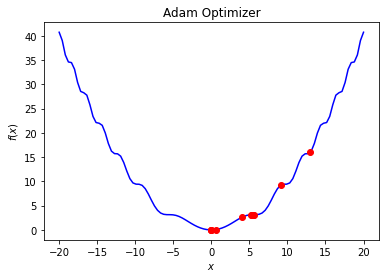

In [24]:
test.plot_optimization(-20, 20)

In [19]:
test = NAG(f, df, 13, learning_rate = 0.01, max_iterations = 500)

In [62]:
test.fit()

0.00017882904851489732

In [63]:
test.get_n_iteration()

290

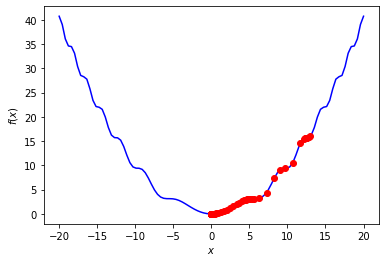

In [64]:
test.plot_optimization(-20, 20)

# Testing: Animating Optimization

In [303]:
test = RMSprop(f, df, x_t = 10, learning_rate = 0.1, max_iterations = 1000, tolerance = 1e-6, n_history_points = 1000, beta_2 = 0.9)

In [304]:
test.fit()

12.533159863939243

In [305]:
test.get_n_iteration()

220

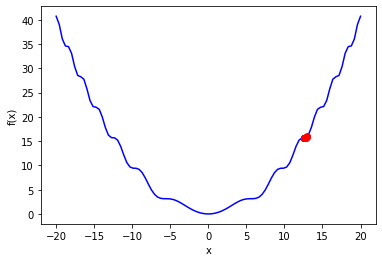

In [306]:
test.plot_optimization(-20, 20)

In [28]:
test = Momentum(f, df, x_t = 10, learning_rate = 0.1, max_iterations = 1000, tolerance = 1e-6, n_history_points = 1000, beta_1 = 0.9)

In [29]:
test.fit()

3.052312707344801e-05

In [30]:
test.get_n_iteration()

241

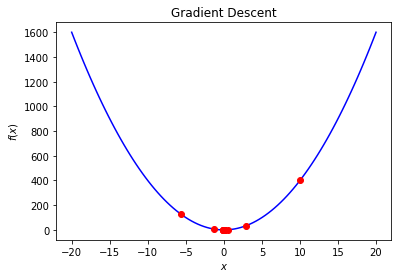

In [31]:
test.plot_optimization(-20, 20)

In [24]:
test = GradientDescent(f, df, 10, learning_rate = 0.1, max_iterations = 1000)

In [25]:
test.fit()

2.047999999999994e-07

In [26]:
test.get_n_iteration()

11

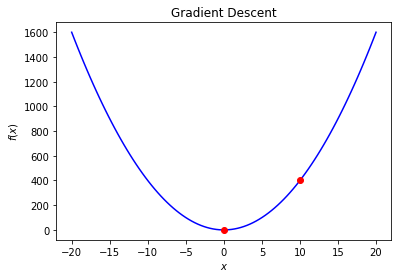

In [27]:
test.plot_optimization(-20, 20)

# Test

In [113]:
test = GradientDescent(f, df, 2.8, learning_rate = 0.001, max_iterations = 300)

In [114]:
test.fit()

0.24955791569460645

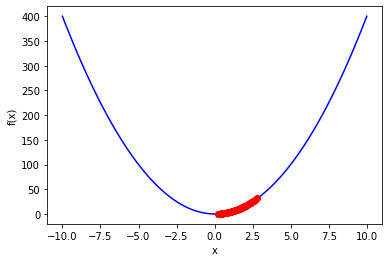

In [115]:
test.plot_optimization(-10,10)

In [97]:
test.get_n_iteration()

173